In [ ]:
# Imporing the required modules and making dataframe
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
df=pd.read_csv('.\covid_19_data.csv')

In [ ]:
# just checking the data
df.tail(7)

print(df.shape)
df.groupby('Country/Region').sum()

In [ ]:
t = df.sort_values('Last Update', ascending=False)
print(t.head())
print(t.tail())
del t

In [ ]:
# Dropping and renamming Some Columns of the data for better readability
df.drop(['SNo', 'Last Update'], inplace=True, axis=1)
df.head(9)


In [ ]:
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'}, inplace=True)
df.tail(8)

In [ ]:
# Changing the Date time format as it is in string
df['Date'] = pd.to_datetime(df['Date'])
df.head()
# print(type(df['Date'][0]))

In [ ]:
# Checking the staats of the data
df.describe()

In [ ]:
# Just checking the country wise stats
df.groupby('Country').describe()

In [ ]:
# Getting the infomatics of the data
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
# Imputing -> Filling the missing values in Data Frame
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df2[33:40]

In [ ]:
# df.loc[df['State'].isnull()]
df[33:40]

# 2nd data frame has now been updated and has no missing values

In [ ]:
# Running Groupby and making a new database country wise

df2 = df.groupby('Country')[['Confirmed','Deaths','Recovered']].sum().reset_index()
# new We can reset the index -> we could have also done with abobe command
# df2.reset_index()

df2[70:101]

In [ ]:
df2.describe()

In [ ]:
# Checking the dates Country wise with a condition having the deaths more than 10000
df2 = df.groupby(['Country', 'Date'])[['Deaths','Confirmed','Recovered']].sum().reset_index()
# df2 = df2[df2['Deaths']>=10000]
df2

In [87]:
countries = df2['Country'].unique()
print(len(countries))

229


### Making the Plots for each country
Plots for all the countries in the data set 

In [89]:
import matplotlib.pyplot as plt

In [101]:
plt.figure(figsize=(50,400))
for idx in range(len(countries)):
    C = df2[df2['Country']==countries[idx]].reset_index()
    plt.subplot(46,5,idx+1)
    plt.plot(np.arange(0,len(C)),C['Confirmed'],color='b',label='Confirmed')
    plt.plot(np.arange(0,len(C)),C['Recovered'],color='g',label='Recovered')
    plt.plot(np.arange(0,len(C)),C['Deaths'],color='r',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days from Case 1')
    plt.ylabel('No. of Cases')
    plt.legend()
plt.show()


All thw countries present in the dataset the graph has been created
<br>
_I used the feature of **Sub plot** for making all of them present in the same image_
<br>


In [102]:
df2

Country       Date  Deaths  Confirmed  Recovered
0                          Azerbaijan 2020-02-28     0.0        1.0        0.0
1                     ('St. Martin',) 2020-03-10     0.0        2.0        0.0
2                         Afghanistan 2020-02-24     0.0        1.0        0.0
3                         Afghanistan 2020-02-25     0.0        1.0        0.0
4                         Afghanistan 2020-02-26     0.0        1.0        0.0
...                               ...        ...     ...        ...        ...
87276  occupied Palestinian territory 2020-03-12     0.0        0.0        0.0
87277  occupied Palestinian territory 2020-03-14     0.0        0.0        0.0
87278  occupied Palestinian territory 2020-03-15     0.0        0.0        0.0
87279  occupied Palestinian territory 2020-03-16     0.0        0.0        0.0
87280  occupied Palestinian territory 2020-03-17     0.0        0.0        0.0

[87281 rows x 5 columns]

In [104]:
# Now Creating the Overall Plot of the Cases in the world
# First we need the data according to the date
df_world = df.groupby('Date')[['Confirmed','Recovered','Deaths']].sum().reset_index()
df_world

Date    Confirmed    Recovered     Deaths
0   2020-01-22        557.0         30.0       17.0
1   2020-01-23       1097.0         60.0       34.0
2   2020-01-24        941.0         39.0       26.0
3   2020-01-25       1437.0         42.0       42.0
4   2020-01-26       2118.0         56.0       56.0
..         ...          ...          ...        ...
489 2021-05-25  167848207.0  104824935.0  3485788.0
490 2021-05-26  168416423.0  105380748.0  3498544.0
491 2021-05-27  168970791.0  106078106.0  3511297.0
492 2021-05-28  169470725.0  106633069.0  3523117.0
493 2021-05-29  169951560.0  107140669.0  3533619.0

[494 rows x 4 columns]

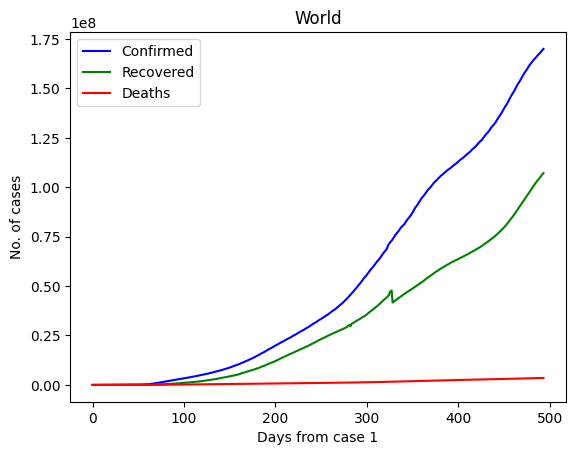

In [108]:
plt.plot(np.arange(0,len(df_world),),df_world['Confirmed'],color='b',label= 'Confirmed')
plt.plot(np.arange(0,len(df_world),),df_world['Recovered'],color='g',label= 'Recovered')
plt.plot(np.arange(0,len(df_world),),df_world['Deaths'],color='r',label= 'Deaths')
plt.title('World')
plt.xlabel('Days from case 1')
plt.ylabel("No. of cases")
plt.legend()                # Shows the box of line color labels
plt.show()